In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
from numpy import *
from scipy.integrate import quad
style.use('classic')

# Ecuación de Laplace en coordenadas polares:

$$ \psi(r,\varphi)=c_{0}+c_{1}\ln(r)+\sum_{n=1}^{\infty}[A_{n}\cos(n\varphi)+B_{n}\sin(n\varphi)](C_{n}r^{-n}+D_{n}r^{n})$$


Si se buscan soluciones finitas dentro de un círculo $r< R$ y con $\psi(r=R,\varphi)=f(\varphi)$, entonces
$$ \psi(r,\varphi)=\sum_{n=0}^{\infty}A_{n}\cos(n\varphi)r^{n}+\sum_{n=1}^{\infty}B_{n}\sin(n\varphi)r^{n},$$
con
$$A_{n}:=\frac{1}{\pi R^{n}}\int_{-\pi}^{\pi}f(\varphi) \cos(n \varphi) d\varphi,\qquad n=0,1,2,\ldots$$
y
$$B_{n}:=\frac{1}{\pi R^{n}}\int_{-\pi}^{\pi}f(\varphi) \sin(n \varphi) d\varphi,\qquad n=1,2,\ldots$$


Consideremos el caso particular en que $f(\varphi):=\frac{1}{2+\sin(\varphi)}$ y calculemos numéricamente los coeficientes $A_{n}$ y $B_{n}$.

In [2]:
R = 1.
def f(ph):
    return 1./(2+sin(ph))

In [3]:
def integrando_a(ph,n):
    return f(ph)*cos(n*ph)
def a(n):
    return (1./(pi*R**n))*quad(integrando_a, -pi, pi, args=n)[0]
def integrando_b(ph,n):
    return f(ph)*sin(n*ph)
def b(n):
    return (1./(pi*R**n))*quad(integrando_b, -pi, pi, args=n)[0]

In [4]:
def S(nmax,ph,r):
    S = 0
    for n in range(nmax+1):
        S = S + (a(n)*cos(n*ph)+b(n)*sin(n*ph))*(r**n)
    return S

Ahora evaluamos algunos parámetros que usaremos para confeccionar el gráfico:

In [5]:
n_ang = 120 #número de divisiones de la coordenada angular
n_radio = 50 #número de divisiones de la coordenada radial
radio = linspace(0.001, R, n_radio) #se define coordenada radial entre 0 y R
ang = linspace(0, 2*pi, n_ang) #se define coordenada angular entre 0 y 2 veces pi

r,p = meshgrid(radio,ang)

X = r*cos(p) #Define dominio en x
Y = r*sin(p) #Define dominio en y
n_max = 20 #número máximo de terminos de la serie truncada
Z = S(n_max, p, r) #valor del potencial

A continuación, un gráfico en colores en el dominio.

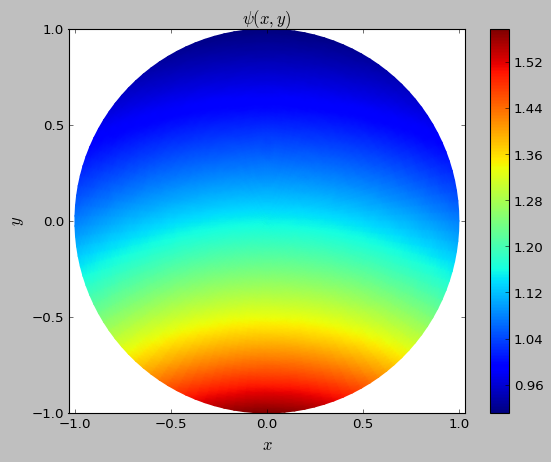

In [6]:
fig = figure()
pcolormesh(X, Y, Z, shading='gouraud')
xlabel('$x$',fontsize=15)
ylabel('$y$',fontsize=15)
title('$\psi(x,y)$',fontsize=15)
colorbar()
axes().set_aspect('equal', 'datalim')